# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

# Loading dataset

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing data for training

In [3]:
X=data.iloc[:,1:5]
y=data.iloc[:,5]

In [4]:
#Splitting data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [5]:
#Feature Scaling as this model involves calculation of distances between two points and hence it is better to feature scale.
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Creating model using SVM

In [6]:
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting values for our test set

In [7]:
y_pred=classifier.predict(X_test)

# Evaluating model prediction

In [8]:
print("Accuracy for test set is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy for test set is: 100.0 %


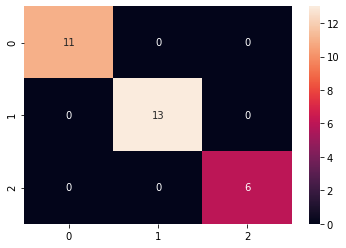

In [9]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [10]:
print("Accuracy for training set:",accuracy_score(y_train,classifier.predict(X_train))*100,"%")

Accuracy for training set: 95.83333333333334 %


>SVM gives us 100% accuracy for test set and 95.83% accuracy for training set.